## Week 4 Lab exercises

In this week we will continue to practise the use of classes, and the numerical solution of higher order non linear ordinary differential equations (ODEs). 

In [5]:
# first we import the libraries we need
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# The following lines makes the plots appear inline in the notebook
%matplotlib inline

### ACTIVITY 1: 

I have written a class below for integrating equations that implements the Euler method. Update it to include the midpoint method and (OPTIONALLY) a 4th order Runge-Kutta method (from scratch, not just by including solve_ivp()!). Be sure to add in asserts to sense check what the class is doing.

C:\Users\blam9\AppData\Local\Temp\ipykernel_38828\320810100.py:97: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  self._y_solution[itime] = y0


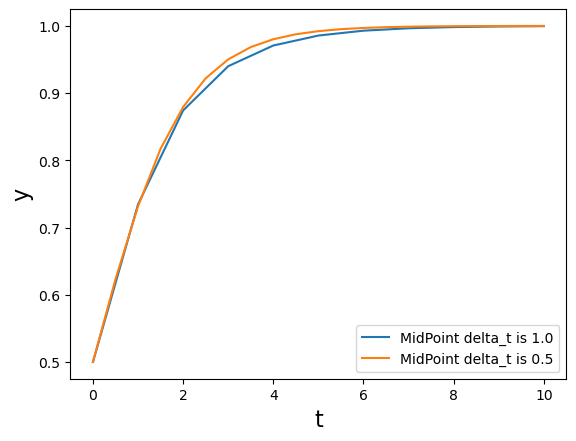

In [45]:
# ExplicitIntegrator class

class ExplicitIntegrator :

    """
    Contains explicit methods to integrate ODEs
    
    attributes: the function to calculate the gradient dydt, max_time, 
                N_time_steps, method
                
    methods: calculate_solution, plot_solution
    
    """
    integration_methods = ["Euler", "MidPoint", "RK4"]
    
    # constructor function
    def __init__(self, dydt, max_time=0, N_time_steps=0, method = "Euler"):
        
        self.dydt = dydt # Note that we are passing in a function, this is ok in python
        self.method = method
        assert self.method in self.integration_methods, 'chosen integration method not implemented'
        
        # Make these private - restrict getting and setting as below
        self._max_time = max_time
        self._N_time_steps = N_time_steps
        
        # Derived from the values above
        self._delta_t = self.max_time / self.N_time_steps
        self._t_solution = np.linspace(0.0, max_time, N_time_steps+1)
        self._y_solution = np.zeros_like(self._t_solution)

    # Enables the user to get the t solution
    @property
    def y_solution(self):
        return self._y_solution

    # Enables the user to get the y solution
    @property
    def t_solution(self):
        return self._t_solution
    
    @property
    def max_time(self):
        return self._max_time

    @property
    def N_time_steps(self):
        return self._N_time_steps
    
    # Enables the user to reset the max time
    @max_time.setter
    def max_time(self, value):
        self._max_time = value
        self._delta_t = self.max_time / self.N_time_steps
        self._t_solution = np.linspace(0.0, self.max_time, self.N_time_steps+1)
        self._y_solution = np.zeros_like(self._t_solution)
        
    # Enables the user to reset the number of time steps
    @N_time_steps.setter
    def N_time_steps(self, value):
        self._N_time_steps = value
        self._delta_t = self.max_time / self.N_time_steps
        self._t_solution = np.linspace(0.0, self.max_time, self.N_time_steps+1)
        self._y_solution = np.zeros_like(self._t_solution)

    def calculate_solution(self, y0) :
        if (self.method == "Euler") :
            self.integrate_using_Euler(self.dydt, y0)
        elif (self.method == "MidPoint") :
            self.integrate_using_midpoint(self.dydt, y0)
        else :
            assert False, 'integration method not implemented'
            
    def plot_solution(self) :
        
        plt.xlabel("t", fontsize=16)
        plt.ylabel("y", fontsize=16) 
        plt.plot(self._t_solution, self._y_solution, '-', 
                 label=self.method + " delta_t is " + str(self._delta_t))
        plt.legend()

    def integrate_using_Euler(self, dydt_function, y0) :
        
        for itime, time in enumerate(self.t_solution) :
            if itime == 0 :
                self._y_solution[itime] = y0
            else :
                dydt_at_t = self.dydt(time, self._y_solution[itime-1])
                self._y_solution[itime] = (self._y_solution[itime-1] + 
                                          dydt_at_t * self._delta_t)
            
    #UPDATE ME!
    def integrate_using_midpoint(self, dydt_function, y0) :
        
        for itime, time in enumerate(self.t_solution) :
            if itime == 0 :
                self._y_solution[itime] = y0
                old_time = time
            else :
                dydt_at_t = self.dydt(old_time, self._y_solution[itime-1]) #evaluates at dydt @ an initial time
                
                t_plus_half = old_time + 0.5*self._delta_t #finds what half time is given old time and a half step in delta_t
                
                y_t_plus_half = (self._y_solution[itime-1] + 0.5 * dydt_at_t * self._delta_t) #approximates the evaluation of y at t+1/2 delta t

                dydt_at_t_plus_half = self.dydt(t_plus_half, y_t_plus_half) #evaluates the derivative at the midpoint
                
                self._y_solution[itime] = (self._y_solution[itime-1] + dydt_at_t_plus_half * self._delta_t) #finds the value of y at the FULl time step
                old_time = time #sets the olt_time to be the new time ready for new iterations
    
#UPDATE ME (OPTIONALLY)
#    def integrate_using_RK4(dydt_function, y0) :


    
# How to use the class - example for the logistic equation

# Note that the function has to take t as the first argument and y as the second#

def calculate_logistic_dydt(t, y):
    """Returns the gradient dy/dt for the logistic equation"""
    dydt = y*(1 - y)
    return dydt

max_time = 10.0
N_time_steps = 10

# Define an object of the class
logistic_integrator = ExplicitIntegrator(calculate_logistic_dydt, max_time, 
                                         N_time_steps, "MidPoint")

# Find and plot the solution
y0 = np.array([0.5])
logistic_integrator.calculate_solution(y0)
logistic_integrator.plot_solution()
#print(logistic_integrator.y_solution)

#Update the number of steps and plot again
logistic_integrator.N_time_steps = 20 # Note how this changes the other attributes above
logistic_integrator.calculate_solution(y0)
logistic_integrator.plot_solution()
#print(logistic_integrator.y_solution)

### ACTIVITY 2:
    
Test the above integrator class on one of the simple differential equations that we have studied so far, and confirm that the convergence orders you obtain when doubling the resolution for each method are as expected.

In [38]:
# Test the integrator



# UPDATE ME!

### ACTIVITY 3:

Write a class that contains information about the Van der Pol oscillator with a source, and solves the second order ODE related to its motion using scipy's solve_IVP method:

$\frac{d^2y}{dt^2} - 2a (1-y^2) \frac{dy}{dt} + y = f(t)$

where $a$ is a damping factor. Your class should allow you to pass in the source function f(t) as an argument that can be changed. 

_HINT: It may help to start with the Ecosystem class in the solutions for last week's tutorial and modify this._

What parts or features of the differential equation tell us if it is:

1. Second or first order
2. Autonomous
3. Linear / non linear
4. Dimension 1 or 2?

In [4]:
class VanDerPolOscillator:
    
    """Definition...
    
       attributes:
       
       methods:
    
    """



### ACTIVITY 4

Initially set $f(t) = 0$. 

Add a method to make a phase plot $(y, dy/dt)$ of the solutions for a range of initial conditions. What do you observe about the behaviour?

In [5]:
# Phase plot

# UPDATE ME!

### ACTIVITY 5

Now set $f(t) = \sin(\omega t)$. For what values of $\omega$ do the methods start to fail? Why?

In [6]:
# UPDATE ME!